In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid")
sns.set_palette('colorblind')

In [2]:
path = 'results/INCT20955/inferences_Local1(Orleans)_d.csv'

In [3]:
df = pd.read_csv(path, sep=',')

In [4]:
df.columns

Index(['path_audio', 'fname', 'sample_rate', 'channels', 'bits', 'samples',
       'length', 'fsize', 'sensor_name', 'date', 'time', 'min', 'max',
       'inference_gbc', 'inference_cnn'],
      dtype='object')

In [5]:
df.head()

,path_audio,fname,sample_rate,channels,bits,samples,length,fsize,sensor_name,date,time,min,max,inference_gbc,inference_cnn
0,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,0.0,3.0,0.0,1.0
1,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,1.0,4.0,0.0,0.0
2,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,2.0,5.0,0.0,1.0
3,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,3.0,6.0,0.0,1.0
4,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,4.0,7.0,0.0,1.0


In [7]:
len(df['fname'].unique())

26174

In [6]:
df['inference_gbc'].value_counts(dropna=False)

0.0    1350139
1.0     125599
NaN      17701
Name: inference_gbc, dtype: int64

In [ ]:
df['inference_cnn'].value_counts(dropna=False)

1.0    1395918
0.0      79820
NaN      17701
Name: inference_cnn, dtype: int64

In [ ]:
df['inference_cnn'].replace({1:0,0:1}).value_counts(dropna=False)

0.0    1395918
1.0      79820
NaN      17701
Name: inference_cnn, dtype: int64

In [ ]:
df_inf = df.dropna()
df_inf['date'] = pd.to_datetime(df_inf['date'])
df_inf['time'] = df_inf['date'].dt.time
df_inf.shape

<ipython-input-8-dcb97825a889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf['date'] = pd.to_datetime(df_inf['date'])
<ipython-input-8-dcb97825a889>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf['time'] = df_inf['date'].dt.time


(1475738, 15)

In [ ]:
df.shape[0] - df_inf.shape[0]

17701

In [ ]:
(df_inf['inference_cnn'] == df_inf['inference_gbc']).value_counts(dropna=False)

False    1372599
True      103139
dtype: int64

In [ ]:
(df_inf['inference_cnn'].replace({1:0,0:1})== df_inf['inference_gbc']).value_counts(dropna=False)

True     1372599
False     103139
dtype: int64

In [ ]:
df_inf['inference_cnn'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: inference_cnn, dtype: float64

In [ ]:
df_inf['inference_cnn'] = df_inf['inference_cnn'].replace({1:0,0:1})

<ipython-input-13-3a437156a38e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf['inference_cnn'] = df_inf['inference_cnn'].replace({1:0,0:1})


In [ ]:
df_inf['inference_cnn'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: inference_cnn, dtype: float64

In [ ]:
df.groupby(['fname'])['max'].max().value_counts()

59.988753    26169
43.990204        2
40.994830        1
57.991837        1
37.999456        1
Name: max, dtype: int64

In [ ]:
df_inf.groupby(['fname'])['max'].max().value_counts()

59.988753    25620
6.000000        22
26.000000       20
58.000000       20
9.000000        20
             ...  
16.000000        2
43.990204        2
40.994830        1
57.991837        1
37.999456        1
Name: max, Length: 61, dtype: int64

In [ ]:
df.head()

,path_audio,fname,sample_rate,channels,bits,samples,length,fsize,sensor_name,date,time,min,max,inference_gbc,inference_cnn
0,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,0.0,3.0,0.0,1.0
1,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,1.0,4.0,0.0,0.0
2,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,2.0,5.0,0.0,1.0
3,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,3.0,6.0,0.0,1.0
4,data/Local1(Orleans)/Visita1/1_gravador/memori...,INCT20955_20190830_203000.wav,22050.0,2.0,16.0,1322752.0,59.988753,4718592.0,INCT20955,2019-08-30 20:30:00,203000,4.0,7.0,0.0,1.0


In [ ]:
df_inf['inference_cnn'].value_counts()

0.0    1395918
1.0      79820
Name: inference_cnn, dtype: int64

In [ ]:
# Total length
df_inf_length = df_inf.groupby(['fname','date','time'])['max'].max().to_frame()
# Presences
df_inf_models = df_inf.groupby(['fname','date','time'])['inference_gbc','inference_cnn'].sum()
df_inferences = pd.concat([df_inf_length,df_inf_models],axis=1)
df_inferences['search_space'] = df_inferences['max'] - 3
df_inferences['prob_gbc'] = round(df_inferences['inference_gbc']/df_inferences['search_space'],2)
df_inferences['prob_cnn'] = round(df_inferences['inference_cnn']/df_inferences['search_space'],2)

df_inferences = df_inferences.reset_index()
df_inferences['hour'] = df_inferences['time'].apply(lambda x: int(str(x).split(':',)[0]))
df_inferences['date'] = pd.to_datetime(df_inferences['date'])

<ipython-input-19-fa1b5b9e1975>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_inf_models = df_inf.groupby(['fname','date','time'])['inference_gbc','inference_cnn'].sum()


Text(0, 0.5, 'Total seconds')

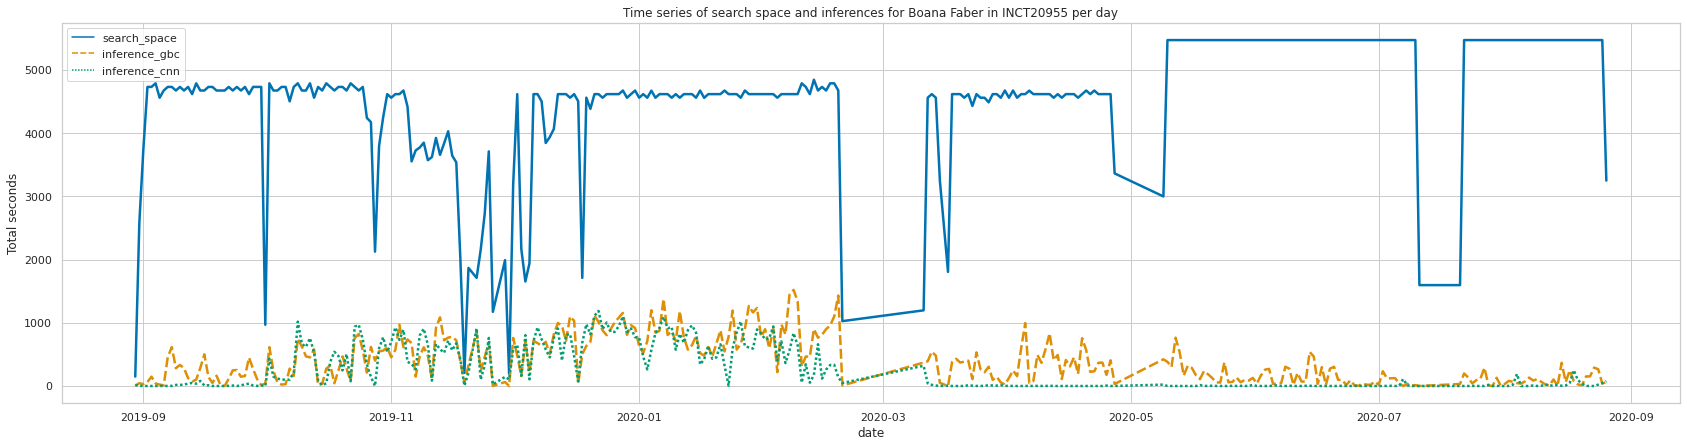

In [ ]:
title = 'Time series of search space and inferences for Boana Faber in INCT20955 per day'
df_plot = df_inferences.groupby(by=df_inferences.date.dt.date).sum()[['search_space','inference_gbc','inference_cnn']]
plt.figure(figsize=(29,7))
sns.lineplot(data=df_plot, linewidth=2.5, sizes=(.25, 2.5, 0.4)).set_title(title)
plt.ylabel('Total seconds')

Text(0, 0.5, 'Mean inference probability')

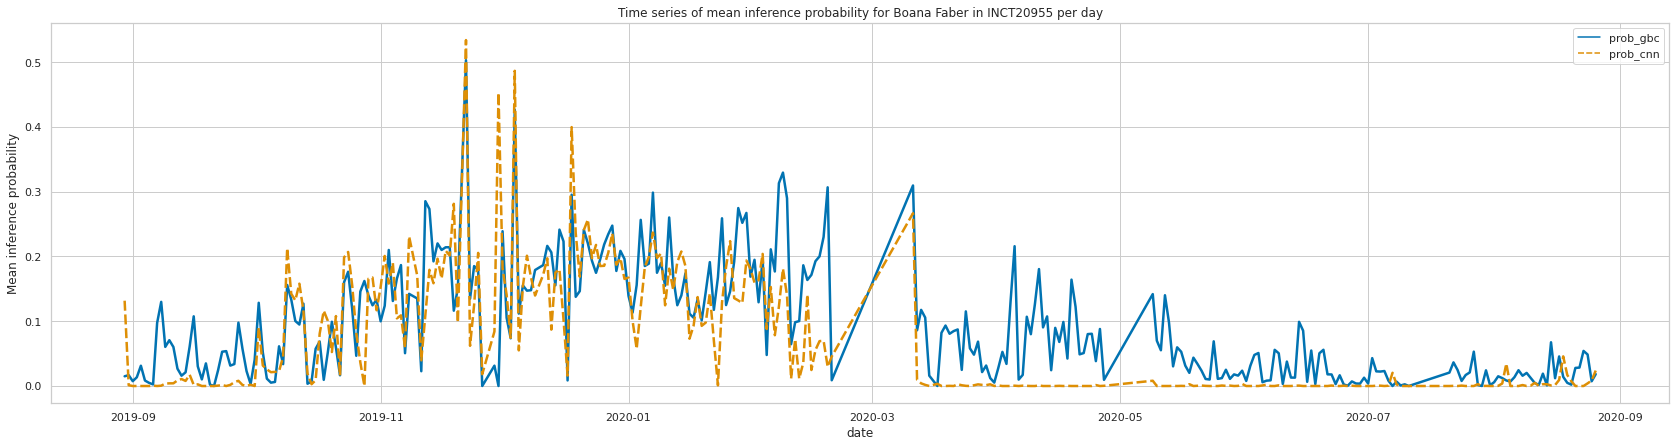

In [ ]:
title = 'Time series of mean inference probability for Boana Faber in INCT20955 per day'
df_plot = df_inferences.groupby(by=df_inferences.date.dt.date).mean()[['prob_gbc','prob_cnn']]
plt.figure(figsize=(29,7))

sns.lineplot(data=df_plot, linewidth=2.5, sizes=(.25, 2.5, 0.4)).set_title(title)
plt.ylabel('Mean inference probability')

In [ ]:
df_heatmap = df_inferences[['hour','date','prob_cnn']]
df_heatmap = df_heatmap.groupby(by=[df_heatmap.date.dt.date,'hour']).mean()[['prob_cnn']].reset_index()
df_heatmap = pd.crosstab(index=df_heatmap['hour'], columns=df_heatmap['date'], values=df_heatmap['prob_cnn'],aggfunc='mean')

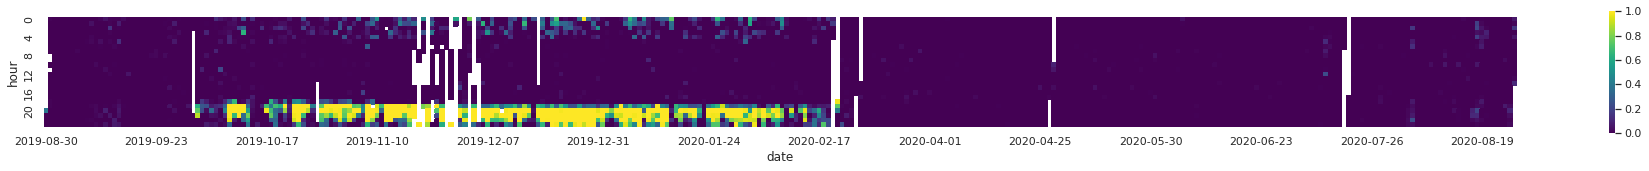

In [ ]:
plt.figure(figsize=(33,7))
sns.heatmap(df_heatmap, vmin=0, vmax=1, cmap="viridis",square=True,cbar=True,cbar_kws={"shrink": .32},
            yticklabels=4, xticklabels=24,)
plt.show()

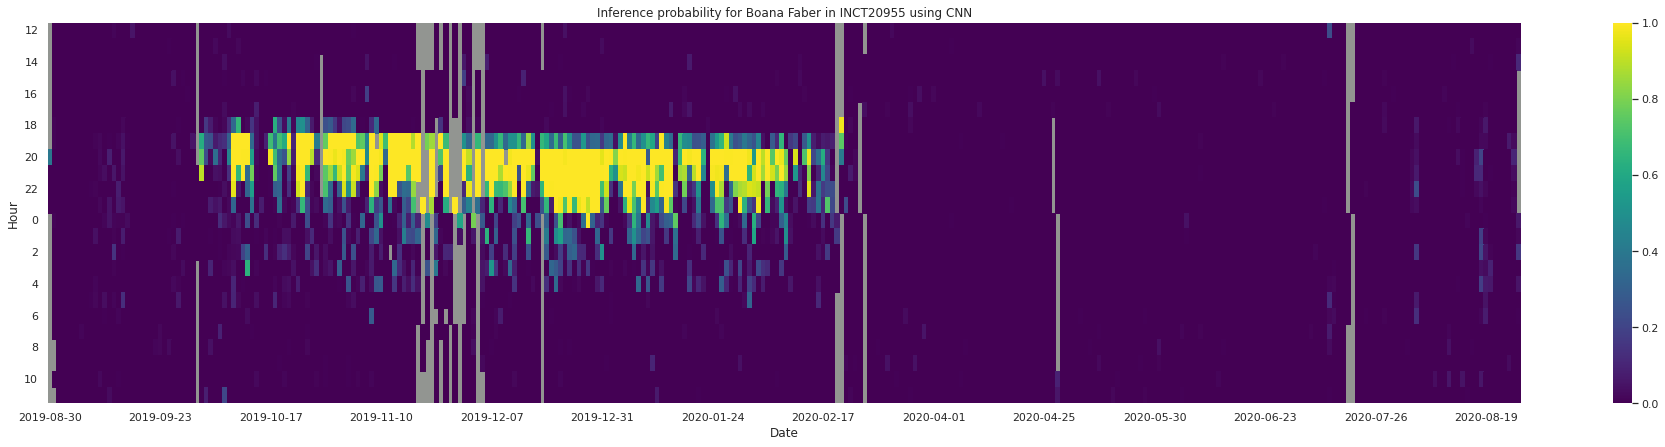

In [ ]:
title = 'Inference probability for Boana Faber in INCT20955 using CNN'
y_axis_labels = [12,13,14,15,16,17,18,19,20,21,22,23,
                 0,1,2,3,4,5,6,7,8,9,10,11,
                 ] # labels for y-axis

df_heatmap_sorted = pd.DataFrame()
for hour in y_axis_labels:
    df_heatmap_sorted = pd.concat([df_heatmap_sorted,df_heatmap.iloc[hour].T],axis=1)
df_heatmap_sorted = df_heatmap_sorted.T
plt.figure(figsize=(33,7))
g = sns.heatmap(df_heatmap_sorted, vmin=0, vmax=1, cmap="viridis",square=False,cbar=True,#cbar_kws={"shrink": .92},
            #yticklabels=y_axis_labels,
            yticklabels=2,
            xticklabels=24,
            mask=df_heatmap_sorted.isnull(),
            )
g.set_facecolor('xkcd:gray')
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Hour')
plt.yticks(rotation=0)

plt.show()

In [ ]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [ ]:
estimator =  RandomForestRegressor(
              # We tuned the hyperparameters of the RandomForestRegressor to get a good
              # enough predictive performance for a restricted execution time.
              n_estimators=2,
              max_depth=10,
              bootstrap=True,
              max_samples=0.5,
              n_jobs=2,
              random_state=0,
          )

fig, (ax1) = plt.subplots(1,1,figsize=(23,5))

imp = IterativeImputer(min_value=0, max_value=1,estimator=estimator)
df_heatmap_sorted2 = df_heatmap_sorted.replace([np.inf, -np.inf], np.nan)
df_heatmap_sorted2 = pd.DataFrame(imp.fit_transform(df_heatmap_sorted2),
                                  columns= df_heatmap_sorted2.columns,
                                  index = df_heatmap_sorted2.index)

g1 = sns.heatmap(df_heatmap_sorted2, vmin=0, vmax=1,
                cmap="viridis",square=False,cbar=True,#cbar_kws={"shrink": .92},
            #yticklabels=y_axis_labels,
            yticklabels=2,
            xticklabels=30,
            #mask=df_heatmap_sorted2.isnull(),
            ax=ax1)
ax1.set_title(title,fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='y', labelrotation = 0, labelsize=14)
plt.subplots_adjust(hspace = 0.1)
plt.savefig('inference_probability_hr.png', dpi=300)
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['date']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
gsdgs

NameError: ignored

In [ ]:
imp.fit_transform(df_heatmap_sorted2).flatten()

In [ ]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,31))


g1 = sns.heatmap(df_heatmap_sorted2.T, vmin=0, vmax=1, cmap="viridis",square=False,cbar=True,#cbar_kws={"shrink": .92},
            #yticklabels=y_axis_labels,
            yticklabels=12,
            xticklabels=2,
            #mask=df_heatmap_sorted2.isnull(),
            ax=ax1)
ax1.set_title(title,fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='y', labelrotation = 0, labelsize=14)

plt.show()


In [ ]:
path_dataset = '/content/drive/MyDrive/Chorus/inference models/inference_results/datasetv2-multiclass_1/df_train_test_files.csv'

In [ ]:
df_dataset = pd.read_csv(path_dataset)
df_dataset = df_dataset[df_dataset['site']=='INCT20955']
df_dataset = df_dataset[df_dataset['subset']=='train']
train_recordings = list(df_dataset['fname'].unique())

In [ ]:
len(train_recordings)

In [ ]:
inferences_recordings = [x.split('.wav')[0] for x in df_inferences['fname'].unique()]
len(inferences_recordings)

In [ ]:
len(set(train_recordings) - set(inferences_recordings))

In [ ]:
"""
 'INCT20955_20191011_001500',
 'INCT20955_20191011_233000'
 """
sorted(set(inferences_recordings))[3270:3356]

In [ ]:
df_inferences['train_data'] = df_inferences['fname'].apply(lambda x: 1 if x.split('.wav')[0] in train_recordings else 0)

In [ ]:
df_inferences['train_data'].value_counts()

In [ ]:
df_inferences2 = df_inferences.copy()
df_inferences2 = df_inferences2[(df_inferences2['date']<'2019-09-30')|(df_inferences2['date']>'2020-04-01')]

df_heatmap_count = df_inferences2[['hour','date','train_data']]
df_heatmap_count = df_heatmap_count.groupby(by=[df_heatmap_count.date.dt.date,'hour']).sum()[['train_data']].reset_index()
df_heatmap_count = pd.crosstab(index=df_heatmap_count['hour'], columns=df_heatmap_count['date'], values=df_heatmap_count['train_data'],aggfunc='sum')

df_heatmap_sorted_count = pd.DataFrame()
for hour in y_axis_labels:
    df_heatmap_sorted_count = pd.concat([df_heatmap_sorted_count,df_heatmap_count.iloc[hour].T],axis=1)
df_heatmap_sorted_count = df_heatmap_sorted_count.T

In [ ]:
df_heatmap_sorted_count.sum().sum()

In [ ]:
df_heatmap = df_inferences2[['hour','date','prob_cnn']]
df_heatmap = df_heatmap.groupby(by=[df_heatmap.date.dt.date,'hour']).mean()[['prob_cnn']].reset_index()
df_heatmap = pd.crosstab(index=df_heatmap['hour'], columns=df_heatmap['date'], values=df_heatmap['prob_cnn'],aggfunc='mean')

df_heatmap_sorted = pd.DataFrame()
for hour in y_axis_labels:
    df_heatmap_sorted = pd.concat([df_heatmap_sorted,df_heatmap.iloc[hour].T],axis=1)
df_heatmap_sorted = df_heatmap_sorted.T

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(33,13))

g1 = sns.heatmap(df_heatmap_sorted, vmin=0, vmax=1, cmap="viridis",square=False,cbar=True,#cbar_kws={"shrink": .92},
            #yticklabels=y_axis_labels,
            yticklabels=2,
            xticklabels=24,
            mask=df_heatmap_sorted.isnull(),
            ax=ax1)
g1.set_facecolor('xkcd:gray')
ax1.set_title(title+'before 2019-09-30 and after 2020-04-01',fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='y', labelrotation = 0)

g2 = sns.heatmap(df_heatmap_sorted_count, vmin=0, vmax=2, 
            cmap="viridis",square=False,cbar=True,#cbar_kws={"shrink": .92},
            cbar_kws={"ticks":[0,1,2]},
            #yticklabels=y_axis_labels,
            yticklabels=2,
            xticklabels=24,
            mask=df_heatmap_sorted_count.isnull(),
            ax=ax2)
g2.set_facecolor('xkcd:gray')
ax2.set_title('Count of data used for training in CNN model before 2019-09-30 and after 2020-04-01',fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='y', labelrotation = 0)
plt.show()

In [ ]:
df_inferences2['train_data'].value_counts()

In [ ]:
df_inferences2.sort_values(by=['prob_cnn','train_data'],ascending=False).head(25)

In [ ]:
list(df_inferences2.sort_values(by=['prob_cnn','train_data'],ascending=False).head(25)['fname'])

In [ ]:
# http://seaborn.pydata.org/examples/heat_scatter.html
# https://plotly.com/python/polar-chart/
# https://datavizcatalogue.com/search/time.html